<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [4]:
df.dtypes

ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


In [6]:
df.value_counts().index

MultiIndex([], names=['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStack

In [7]:
df.shape

(65437, 114)

In [9]:
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [10]:
missing_values = df.isnull().sum()
print(missing_values)

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


In [14]:
def impute_with_mode(df, RemoteWork):
    mode_value = df['RemoteWork'].mode()[0]
    df.fillna({'RemoteWork': mode_value}, inplace=True)
    return df

data = {'RemoteWork': ['Hybrid (some remote, some in-person)', 'Remote', 'In-person']}
df = pd.DataFrame(data)
df = impute_with_mode(df, 'RemoteWork')
print(df)


                             RemoteWork
0  Hybrid (some remote, some in-person)
1                                Remote
2                             In-person


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [19]:
df.YearsCodePro.value_counts().index

Index(['2', '3', '5', '10', '4', 'Less than 1 year', '6', '1', '8', '7', '12',
       '15', '20', '9', '11', '13', '14', '25', '16', '18', '17', '30', '24',
       '19', '22', '23', '26', '27', '21', '28', '35', '29', '40', '32', '34',
       '38', '33', '36', '31', '37', '45', '42', '39', '41',
       'More than 50 years', '44', '43', '46', '50', '48', '49', '47'],
      dtype='object', name='YearsCodePro')

In [18]:
df.JobSat.value_counts().index

Index([8.0, 7.0, 6.0, 9.0, 10.0, 5.0, 3.0, 4.0, 2.0, 0.0, 1.0], dtype='float64', name='JobSat')

In [17]:
df.Employment.value_counts().index

Index(['Employed, full-time',
       'Independent contractor, freelancer, or self-employed',
       'Student, full-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Not employed, but looking for work', 'Employed, part-time',
       'Student, full-time;Employed, part-time',
       'Employed, full-time;Student, full-time',
       'Employed, full-time;Student, part-time',
       'Student, full-time;Not employed, but looking for work',
       ...
       'Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed',
       'Employed, full-time;Not employed, but looking for work;Not employed, and not looking for work;Employed, part-time',
       'Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Retired',
       'Employed, full-time;Student, full-time;Not employed, but looking for work;Student, part-time;Employed, part

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


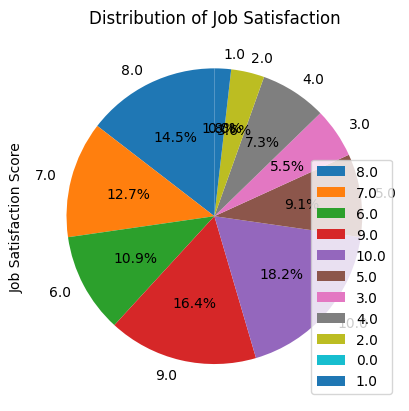

In [20]:
data = {'JobSat': [8.0, 7.0, 6.0, 9.0, 10.0, 5.0, 3.0, 4.0, 2.0, 0.0, 1.0]}
df = pd.DataFrame(data)

df.plot(kind='pie', y='JobSat', labels=df['JobSat'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Job Satisfaction')
plt.ylabel('Job Satisfaction Score')
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [34]:
df.LanguageHaveWorkedWith.value_counts()

LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript                                                    1002
Python                                                                             832
HTML/CSS;JavaScript;PHP;SQL                                                        503
C#                                                                                 452
HTML/CSS;JavaScript                                                                452
                                                                                  ... 
Dart;Java;JavaScript;Kotlin;PowerShell;Python;SQL;TypeScript                         1
C#;Go;Java;JavaScript;Perl;Python;SQL;TypeScript                                     1
C;HTML/CSS;JavaScript;MATLAB;PHP;Python;TypeScript                                   1
C;Dart;Delphi;Java;Kotlin;Objective-C;PHP;SQL                                        1
Bash/Shell (all shells);C;C#;C++;Go;HTML/CSS;JavaScript;Lua;PHP;SQL;TypeScript       1
Name: count, Length:

In [30]:
df.LanguageWantToWorkWith.value_counts()

LanguageWantToWorkWith
Python                                                                          922
Rust                                                                            737
HTML/CSS;JavaScript;TypeScript                                                  632
C#                                                                              538
Go                                                                              460
                                                                               ... 
Assembly;Bash/Shell (all shells);C;C++;HTML/CSS;Lua;MATLAB;PowerShell;Python      1
Bash/Shell (all shells);HTML/CSS;Java;Kotlin;Python;Ruby;Rust;SQL;TypeScript      1
Bash/Shell (all shells);Java;Rust;Scala;SQL;TypeScript                            1
Dart;F#;TypeScript                                                                1
C#;Dart;Go;HTML/CSS;JavaScript;Python;R;SQL;TypeScript                            1
Name: count, Length: 22769, dtype: int64

In [24]:
df.LanguageWantToWorkWith.value_counts().index

Index(['Python', 'Rust', 'HTML/CSS;JavaScript;TypeScript', 'C#', 'Go', 'Java',
       'C#;HTML/CSS;JavaScript;SQL;TypeScript', 'Python;SQL', 'Python;Rust',
       'JavaScript;TypeScript',
       ...
       'HTML/CSS;JavaScript;Python;Scala;Solidity;TypeScript',
       'C;C++;Go;Java;JavaScript;Python;Rust;SQL',
       'Assembly;C;C#;C++;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript',
       'Dart;Kotlin;Objective-C;SQL', 'GDScript;Go;Python;Rust',
       'Assembly;Bash/Shell (all shells);C;C++;HTML/CSS;Lua;MATLAB;PowerShell;Python',
       'Bash/Shell (all shells);HTML/CSS;Java;Kotlin;Python;Ruby;Rust;SQL;TypeScript',
       'Bash/Shell (all shells);Java;Rust;Scala;SQL;TypeScript',
       'Dart;F#;TypeScript',
       'C#;Dart;Go;HTML/CSS;JavaScript;Python;R;SQL;TypeScript'],
      dtype='object', name='LanguageWantToWorkWith', length=22769)

In [23]:
df.LanguageHaveWorkedWith.value_counts().index

Index(['HTML/CSS;JavaScript;TypeScript', 'Python',
       'HTML/CSS;JavaScript;PHP;SQL', 'C#', 'HTML/CSS;JavaScript',
       'Python;SQL', 'Java', 'C#;HTML/CSS;JavaScript;SQL;TypeScript',
       'JavaScript;TypeScript', 'C#;HTML/CSS;JavaScript;SQL',
       ...
       'Assembly;C++;Crystal;HTML/CSS;Java;JavaScript;Lisp;PHP;VBA;Visual Basic (.Net)',
       'C#;HTML/CSS;PowerShell;Ruby;SQL;TypeScript',
       'Bash/Shell (all shells);C;C++;Dart;HTML/CSS;Java;JavaScript;PHP;Python;R;SQL;TypeScript',
       'Bash/Shell (all shells);C++;Clojure;Dart;HTML/CSS;Java;JavaScript;Python;Swift',
       'Apex;Bash/Shell (all shells);C#;C++;MATLAB;SQL',
       'Dart;Java;JavaScript;Kotlin;PowerShell;Python;SQL;TypeScript',
       'C#;Go;Java;JavaScript;Perl;Python;SQL;TypeScript',
       'C;HTML/CSS;JavaScript;MATLAB;PHP;Python;TypeScript',
       'C;Dart;Delphi;Java;Kotlin;Objective-C;PHP;SQL',
       'Bash/Shell (all shells);C;C#;C++;Go;HTML/CSS;JavaScript;Lua;PHP;SQL;TypeScript'],
      dtype='obj

                     Team  Python  HTML/CSS;JavaScript;TypeScript  \
0  LanguageHaveWorkedWith     832                            1002   
1  LanguageWantToWorkWith     922                             632   

   HTML/CSS;JavaScript  Rust  HTML/CSS;JavaScript;PHP;SQL   C#   Go  
0                  452     0                          503  452    0  
1                    0   737                            0  538  460  


<Axes: title={'center': 'Popularity of Programming Languages'}, xlabel='Team'>

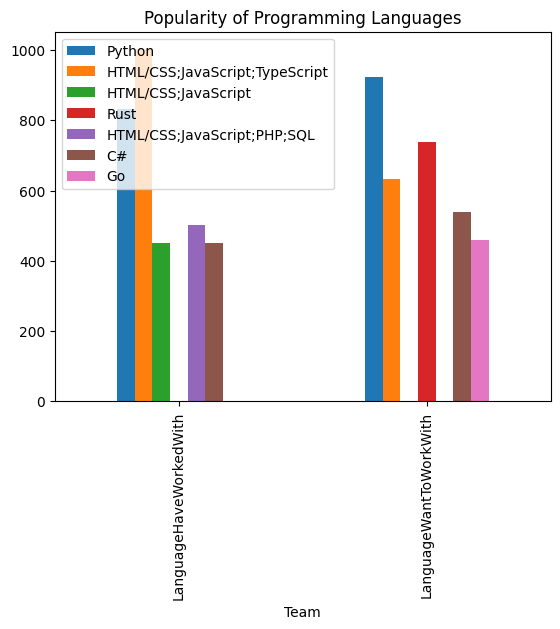

In [36]:
import matplotlib.pyplot as plt 
import pandas as pd 
  
df = pd.DataFrame([['LanguageHaveWorkedWith', 832, 1002, 452, 0, 503, 452, 0], ['LanguageWantToWorkWith', 922, 632, 0, 737, 0, 538, 460]], 
                  columns=['Team', 'Python', 'HTML/CSS;JavaScript;TypeScript','HTML/CSS;JavaScript', 'Rust', 'HTML/CSS;JavaScript;PHP;SQL', 'C#', 'Go']) 

print(df) 
  

df.plot(x='Team', 
        kind='bar', 
        stacked=False, 
        title='Popularity of Programming Languages') 

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


In [ ]:
df = pd.DataFrame([['Hybrid', 10, 20, 10, 30], ['Remote', 20, 25, 15, 25], ['In-Person', 12, 15, 19, 6], 
                  columns=['Team', 'US', 'Germany', 'India', 'UK', 'Ukraine']) 
# view data 
print(df) 
  
# plot grouped bar chart 
df.plot(x='Team', 
        kind='bar', 
        stacked=False, 
        title='Grouped Bar Graph with dataframe') 

In [42]:
df.RemoteWork.value_counts()

RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64

In [41]:
df.Country.value_counts()

Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
                                                        ...  
Micronesia, Federated States of...                          1
Nauru                                                       1
Chad                                                        1
Djibouti                                                    1
Solomon Islands                                             1
Name: count, Length: 185, dtype: int64

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [26]:
import numpy as np

x = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
y = [276, 772, 1165, 1130, 1956, 3751, 6379, 7509, 3626, 2251]
correlation_matrix = np.corrcoef(x, y)
JobSat_pearson_corr = correlation_matrix[0, 1]
print(JobSat_pearson_corr)

import numpy as np

x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
y = [2856, 2639, 4168, 4093, 3215, 3526, 2843, 2517, 2549, 1493, 3251, 1312, 1777, 1127, 1082, 1635, 946, 814, 867, 516, 1549, 380, 492, 448, 632, 998, 426, 380, 342, 196, 689, 106, 194, 132, 169, 285, 119, 104, 134, 54, 194, 51, 55, 37, 42, 56, 21, 10, 14, 11, 50]
correlation_matrix = np.corrcoef(x, y)
YearsCodePro_pearson_corr = correlation_matrix[0, 1]
print(YearsCodePro_pearson_corr)

0.6551019219404419
-0.8594267801553208


In [23]:
df.YearsCodePro.value_counts()

YearsCodePro
2                     4168
3                     4093
5                     3526
10                    3251
4                     3215
Less than 1 year      2856
6                     2843
1                     2639
8                     2549
7                     2517
12                    1777
15                    1635
20                    1549
9                     1493
11                    1312
13                    1127
14                    1082
25                     998
16                     946
18                     867
17                     814
30                     689
24                     632
19                     516
22                     492
23                     448
26                     426
27                     380
21                     380
28                     342
35                     285
29                     196
40                     194
32                     194
34                     169
38                     134
33             

In [10]:
df.JobSat.value_counts()

JobSat
8.0     7509
7.0     6379
6.0     3751
9.0     3626
10.0    2251
5.0     1956
3.0     1165
4.0     1130
2.0      772
0.0      311
1.0      276
Name: count, dtype: int64

### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [29]:
cross_tab = pd.crosstab(df['Employment'], df['EdLevel'])
print(cross_tab)

EdLevel                                             Associate degree (A.A., A.S., etc.)  \
Employment                                                                                
Employed, full-time                                                                1059   
Employed, full-time;Employed, part-time                                               9   
Employed, full-time;Independent contractor, fre...                                  104   
Employed, full-time;Independent contractor, fre...                                   11   
Employed, full-time;Independent contractor, fre...                                    0   
...                                                                                 ...   
Student, full-time;Student, part-time;Employed,...                                    0   
Student, full-time;Student, part-time;Retired                                         0   
Student, part-time                                                                   12   

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [30]:
df.to_csv('cleaned_survey-data.csv', index=False)

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
